In [1]:
import numpy as np
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split as tts

In [2]:
os.chdir('.\cnn_font_jpeg')  # 相対パス
print(os.getcwd())

D:\application\OneDrive\デスクトップ\AnaChro\cnn_font_jpeg


In [3]:
x_train = np.load('cnn_font_gif.npy')
y_train = np.load('cnn_font_label.npy')

In [18]:
labels = ["gothic", "mincho","kyokasyo"]

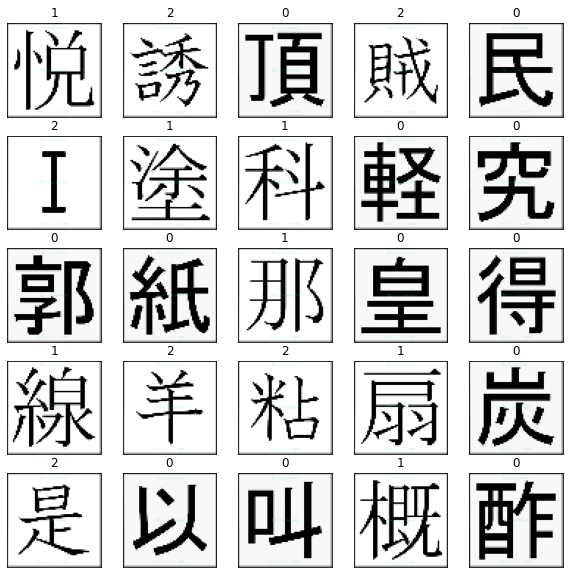

In [5]:
i = 0
n_image = 25

rand_idx = np.random.randint(0, len(x_train), n_image)

plt.figure(figsize=(10,10))  # 画像の表示サイズ
for i in range(n_image):
    cifar_img = plt.subplot(5,5,i+1)
    
    plt.imshow(x_train[rand_idx[i]])
    label = y_train[rand_idx[i]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # ラベルとメモリを非表示に

plt.show()

#img_box:画像が入ってる
#img_label:one_hot表現済みのラベルが入ってる

## 各設定

In [7]:
from keras.utils.np_utils import to_categorical

#batch_size = 32
#epochs = 20
n_class = 3  # 2のクラスに分類

# one-hot表現に変換
y_train_one_hot = to_categorical(y_train, n_class)
#t_test = to_categorical(t_test, n_class)
print(y_train_one_hot[:10])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


## モデルの構築

In [8]:
img_len, img_h, img_w, img_c = x_train.shape

In [9]:
model = Sequential()

model.add(Conv2D(3, #3枚使う
                 kernel_size = (4, 4), #フィルタは3 * 3
                 activation = 'relu', 
                 input_shape = (img_h, img_w, img_c)))#Conv2D：二次元畳み込み層
model.add(Conv2D(3, (4, 4), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (4, 4)))#MaxPooling2D：プーリング層

model.add(Dropout(0.25))#Dropout:ドロップアウト層
model.add(Flatten())#二次元データを１次元に変更
model.add(Dense(3, activation = 'relu'))#Dense:全結合層
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

In [10]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 61, 3)         195       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 3)         147       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 3)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 3)         0         
                                                                 
 flatten (Flatten)           (None, 588)               0         
                                                                 
 dense (Dense)               (None, 3)                 1767      
                                                        

## 前処理

In [11]:
x_train_std = x_train / 255  # 0から1の範囲に収める
#y_train_std = y_train / 255  # 0から1の範囲に収める
print(x_train_std.shape)
#print(y_train_std.shape)

(5457, 64, 64, 4)


In [12]:
tts_x_train, tts_x_test, tts_label_train, tts_label_test = tts(x_train_std, y_train_one_hot, test_size=0.4, random_state=1)

print(tts_x_train.shape, tts_x_test.shape, tts_label_train.shape, tts_label_test.shape)

(3274, 64, 64, 4) (2183, 64, 64, 4) (3274, 3) (2183, 3)


## 学習

In [13]:
history = model.fit(tts_x_train, tts_label_train, epochs = 54, batch_size = 60,
                    validation_data=(tts_x_test, tts_label_test))

Epoch 1/54
55/55 [==============================] - 5s 70ms/step - loss: 1.0852 - accuracy: 0.3754 - val_loss: 1.0001 - val_accuracy: 0.4966
Epoch 2/54
55/55 [==============================] - 4s 69ms/step - loss: 0.9953 - accuracy: 0.4578 - val_loss: 0.8895 - val_accuracy: 0.6042
Epoch 3/54
55/55 [==============================] - 4s 64ms/step - loss: 0.9228 - accuracy: 0.4872 - val_loss: 0.7746 - val_accuracy: 0.6372
Epoch 4/54
55/55 [==============================] - 4s 65ms/step - loss: 0.8601 - accuracy: 0.5706 - val_loss: 0.6922 - val_accuracy: 0.9130
Epoch 5/54
55/55 [==============================] - 4s 65ms/step - loss: 0.7947 - accuracy: 0.6268 - val_loss: 0.5695 - val_accuracy: 0.9441
Epoch 6/54
55/55 [==============================] - 4s 66ms/step - loss: 0.7867 - accuracy: 0.6292 - val_loss: 0.5095 - val_accuracy: 0.9606
Epoch 7/54
55/55 [==============================] - 4s 65ms/step - loss: 0.7715 - accuracy: 0.6289 - val_loss: 0.4871 - val_accuracy: 0.9629
Epoch 8/54
55

## 学習の推移

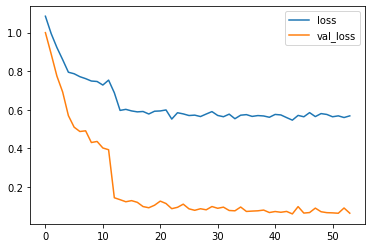

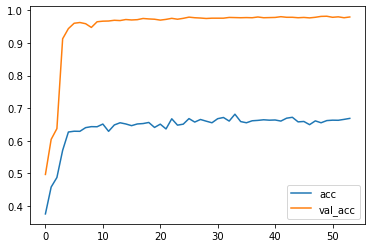

In [14]:
train_loss = history.history['loss']  # 訓練用データの誤差
train_acc = history.history['accuracy']  # 訓練用データの精度
val_loss = history.history['val_loss']  # 検証用データの誤差
val_acc = history.history['val_accuracy']  # 検証用データの精度

plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

## 評価

In [15]:
loss, accuracy = model.evaluate(tts_x_test, tts_label_test)
print(loss, accuracy)

69/69 [==============================] - 1s 8ms/step - loss: 0.0632 - accuracy: 0.9798
0.06322551518678665 0.9798442721366882


## 予測

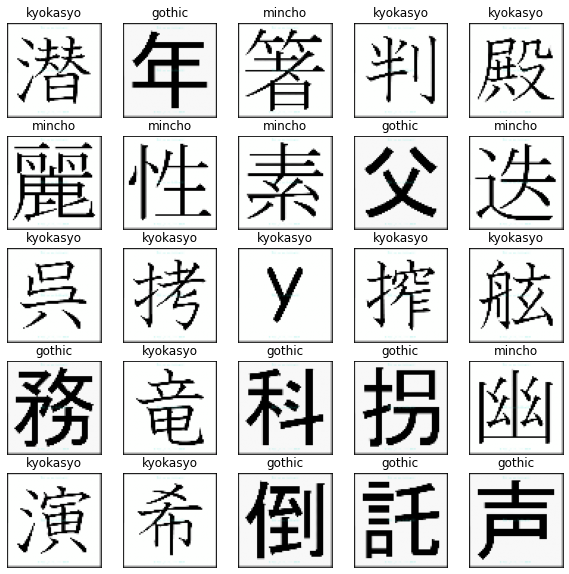

In [19]:
n_image = 25
rand_idx = np.random.randint(0, len(tts_x_test), n_image)

y_rand = model.predict(tts_x_test[rand_idx])
predicted_class = np.argmax(y_rand, axis=1)

plt.figure(figsize=(10, 10))  # 画像の表示サイズ
for i in range(n_image):
    cifar_img=plt.subplot(5, 5, i+1)
    plt.imshow(tts_x_test[rand_idx[i]])
    label = labels[predicted_class[i]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()

## 保存

In [20]:
path = r'D:\application\OneDrive\デスクトップ\AnaChro\model_cnn_font'
print(path)


D:\application\OneDrive\デスクトップ\AnaChro\model_cnn_font


In [21]:
os.path.exists(path)

False

In [22]:
if not os.path.exists(path):
    os.makedirs(path)

In [23]:
model.save(path + "model_cnn_font.h5")